# Open data 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from iminuit import cost, Minuit
from scipy import integrate

In [53]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6) # inches
plt.rcParams['font.size'] = 20
plt.rcParams['figure.dpi'] = 500

In [55]:
data = pd.read_csv('data_2015_2018_sorted.csv', index_col = 0)


In [56]:
data

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets,jet1_pt,...,jet23_DL1R,jet1_fom,jet2_fom,jet3_fom,quark_fom,y1_fom,y2_fom,H_fom,mjjj,myy
0,100306.0,1.583090,-2.771700,254544.0,27681.6,1.950120,-2.606190,99263.2,3,159760.0,...,-9000.0,[281436. 113519.46709087 112412.580218...,[181587. -34736.86842756 -60626.496899...,[ 29198.9 9580.02022195 -25353.311439...,[492221.9 88362.61888526 26432.771879...,[254544. -93521.91987973 -36262.158485...,[ 99263.2 -23807.92742086 -14122.803209...,[ 353807.2 -117329.84730059 -50384.961...,287.510891,21.333494
1,44766.2,-0.187410,-1.563880,45554.6,36462.7,-0.149555,1.516920,36871.3,3,130031.0,...,-9000.0,[ 131913. 35856.85578551 -124989.386...,[ 1375690. -26320.45602265 51671....,[430789. 8439.19719637 37554.556712...,[1938392. 17975.59695923 -35763.308...,[ 45554.6 309.61520012 -44765.129295...,[36871.3 1963.52611159 36409.79341467 ...,[ 82425.9 2273.14131171 -8355.335881...,1702.418995,80.780545
2,76363.3,-0.767057,-0.620654,99951.8,58337.7,-1.905450,-2.373230,200425.0,5,70536.1,...,-9000.0,[ 74788.3 -35239.02389002 61102.803523...,[119519. 44819.22870168 46464.879362...,[ 72309.8 -53791.50777313 -2478.994443...,[266617.1 -44211.30296148 105088.688442...,[ 99951.8 62121.41363583 -44410.399173...,[ 200425. -41947.6952594 -40542.300...,[ 300376.8 20173.71837643 -84952.699...,239.098439,130.172551
3,68569.8,-1.318990,2.426010,137381.0,59413.2,0.069536,0.117943,59556.9,3,122012.0,...,-9000.0,[140340. 121977.8200986 -2887.827555...,[ 214753. -128717.22448836 -21277.486...,[ 36683.2 -27724.58313085 -21608.963913...,[ 391776.2 -34463.98752061 -45774.277...,[ 137381. -51750.39022843 44985.715...,[59556.9 59000.44362363 6991.13627776 ...,[ 196937.9 7250.0533952 51976.851...,371.795081,151.082545
4,28967.0,-1.335100,0.047553,58853.6,25646.0,0.086051,1.972240,25741.0,3,40522.9,...,-9000.0,[113271. 39634.50642308 8438.680288...,[132627. -50345.0363351 -62035.703852...,[ 77563.9 -17644.82861151 34987.711018...,[323461.9 -28355.35852353 -18609.312545...,[ 58853.6 28934.25467155 1376.951561...,[ 25741. -10021.11415785 23607.087644...,[ 84594.6 18913.14051369 24984.039205...,287.332120,61.409879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915046,43052.0,0.972883,2.019500,65085.0,29212.8,-1.262660,0.677569,55763.1,3,39510.8,...,-9000.0,[ 40143.2 -16116.8463106 36074.237090...,[ 134035. -59045.61213072 -108866.628...,[ 126632. 46048.25214018 -12033.866...,[ 300810.2 -29114.20630115 -84826.257...,[ 65085. -18675.86698674 38790.291263...,[ 55763.1 22759.66371864 18313.530278...,[120848.1 4083.79673189 57103.821541...,235.669065,106.419056
915047,35548.2,-0.813135,0.597981,47962.2,32829.0,-0.071262,-2.573490,32912.4,3,35459.4,...,-9000.0,[ 37251.8 11574.07748514 -33517.305660...,[ 198638. -4612.84522809 43373.397...,[139978. -33492.42992306 5029.094178...,[375867.8 -26531.197666 14885.185698...,[ 47962.2 29379.66109544 20012.746866...,[ 32912.4 -27672.32993785 -17663.108356...,[ 80874.6 1707.33115759 2349.638510...,368.264688,73.070564
915048,200586.0,-0.223262,-2.709550,205606.0,35353.8,-2.088970,1.908730,144957.0,5,36859.8,...,-9000.0,[37681.8 87.22225099 36859.69680178 ...,[601952. 134836.84163709 34775.136783...,[ 84386.5 63431.57603114 27740.701604...,[724020.3 198355.63991922 99375.535189...,[ 205606. -182154.62009155 -83990.700...,[ 144957. -11721.14024795 33354.250...,[ 350563. -193875.7603395 -50636.449...,434.591013,219.646197
915049,58914.9,2.280170,0.011987,291057.0,48413.6,1.742550,-1.590900,142505.0,3,32541.1,...,-9000.0,[ 806291. -32047.68926123 5645.245...,[194739. -36068.82547814 -47161.350252...,[100601. -25361.92234443 -18017.142920...,[1101631. -93478.4370838 -59533.247...,[291057. 58910.66771672 706.166538...,[142505. -973.22563389 -48403.816965...,[433562. 57937.44208283 -47697.650426...,830.013720,82.048523


In [57]:
data.describe()['Njets'][['min', 'max']]

min     3.0
max    23.0
Name: Njets, dtype: float64

# Plot photon variables

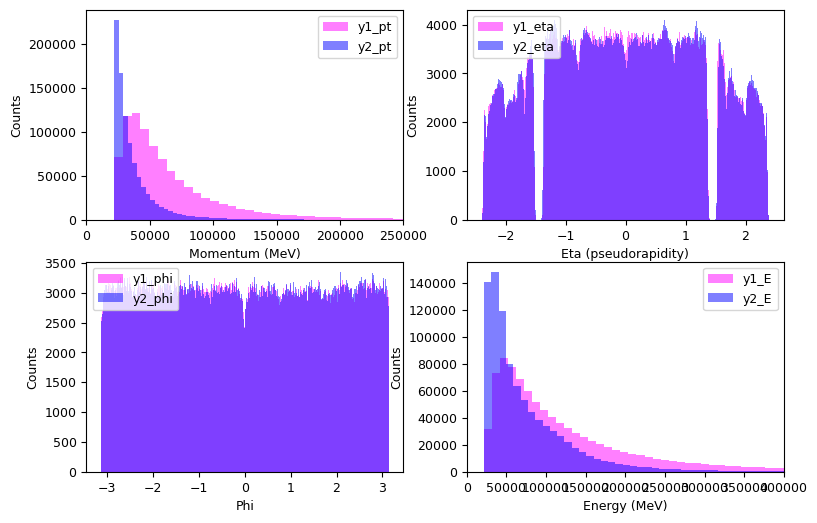

In [6]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(data['y1_pt'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_pt')
axs[0, 0].hist(data['y2_pt'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_pt');
axs[0,0].set_xlabel('Momentum (MeV)')
axs[0,0].set_ylabel('Counts')
axs[0,0].set_xlim(0, 0.25e6)
axs[0,0].legend()

axs[0, 1].hist(data['y1_eta'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_eta')
axs[0, 1].hist(data['y2_eta'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_eta');
axs[0,1].set_xlabel('Eta (pseudorapidity)')
axs[0,1].set_ylabel('Counts')
axs[0,1].legend()

axs[1, 0].hist(data['y1_phi'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_phi')
axs[1, 0].hist(data['y2_phi'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_phi');
axs[1,0].set_xlabel('Phi')
axs[1,0].set_ylabel('Counts')
axs[1,0].legend()

axs[1, 1].hist(data['y1_E'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_E')
axs[1, 1].hist(data['y2_E'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_E');
axs[1,1].set_xlabel('Energy (MeV)')
axs[1,1].set_ylabel('Counts')
axs[1,1].set_xlim(0, 0.4e6)
axs[1,1].legend();

# Cuts

In [58]:
data = data[data.jet1_DL1R > 4]
data = data[data.mjjj < 230]

In [59]:
data = data[data.myy > 100]
data = data[data.myy < 160]

In [60]:
data

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets,jet1_pt,...,jet23_DL1R,jet1_fom,jet2_fom,jet3_fom,quark_fom,y1_fom,y2_fom,H_fom,mjjj,myy
363,64254.5,1.937410,-1.202170,227616.0,54191.8,1.047970,2.007660,86774.8,4,45835.8,...,-9000.0,[ 58105.5 -35538.05107032 28947.668088...,[175189. 69465.23425367 -11424.974062...,[101252. -552.86796807 31208.103210...,[334546.5 33374.31521528 48730.797236...,[227616. 23153.10529728 -59938.088769...,[ 86774.8 -22928.53854666 49102.273952...,[ 3.14390800e+05 2.24566751e+02 -1.08358148e+...,154.262111,129.819902
494,71052.6,-2.179660,1.111060,318186.0,47955.1,-1.852080,-3.061670,156573.0,4,42668.6,...,-9000.0,[ 61179.1 -27733.26820641 -32426.459266...,[ 269143. 150690.94755324 28872.425...,[ 191476. 54720.15045268 -14379.287...,[ 521798.1 177677.8297995 -17933.321...,[ 318186. 31526.87892371 63675.174...,[ 156573. -47802.0217789 -3828.619...,[ 474759. -16275.14285519 59846.554...,205.764941,103.366127
997,182606.0,-0.114117,-3.024220,183796.0,47307.6,-1.539300,-2.956940,115333.0,4,41305.0,...,-9000.0,[ 59906.8 -11960.93053629 39535.290130...,[85485.6 79021.97538139 23929.52618237 ...,[ 72883. 50128.5928529 -12987.523408...,[218275.4 117189.637698 50477.292904...,[ 183796. -181349.62219762 -21383.773...,[ 115333. -46503.37479757 -8685.916...,[ 299129. -227852.99699519 -30069.690...,174.831830,144.097253
1604,56757.0,-1.367200,-1.487750,118599.0,31153.1,0.685587,2.268990,38765.9,3,26808.5,...,-9000.0,[27355.8 25110.13318056 9390.25473055 ...,[ 49949. 22343.45675991 -29406.128696...,[122929. -15612.09757319 24336.484073...,[200233.8 31841.49236729 4320.610107...,[ 118599. 4708.04435682 -56561.394...,[ 38765.9 -20026.30559525 23863.418108...,[157364.9 -15318.26123843 -32697.976564...,177.170801,129.955511
1671,50989.7,-0.063882,-0.929478,51093.8,49253.6,2.047840,-2.314100,194064.0,3,34302.5,...,-9000.0,[ 66707.2 -5287.61379397 33892.516085...,[ 36052.5 -31745.1254285 16176.299098...,[ 34465.3 22878.13114812 -11317.964495...,[137225. -14154.60807435 38750.850688...,[ 51093.8 30504.70766863 -40858.442409...,[194064. -33331.08760667 -36262.318071...,[245157.8 -2826.37993805 -77120.760481...,104.741060,141.863630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914101,50746.5,1.594360,-2.343180,130120.0,49695.1,0.055163,0.366580,49770.7,3,35444.1,...,-9000.0,[195763. 30682.87889742 -17743.876898...,[ 76725.1 -27184.65408915 -48984.845496...,[ 42415.3 25710.17752973 29190.410645...,[314903.4 29208.402338 -37538.311749...,[130120. -35413.16712447 -36347.143718...,[49770.7 46393.28875517 17811.95448257 ...,[179890.7 10980.1216307 -18535.189235...,209.399177,129.907312
914538,87843.1,0.057498,-2.388170,87988.3,64417.4,0.141760,1.277370,65065.8,5,29432.6,...,-9000.0,[ 58456. -6869.88013039 28619.620712...,[ 60898.3 -37196.19128255 -26971.464396...,[ 58345.4 34755.20561568 -25539.627691...,[177699.7 -9310.86579726 -23891.471375...,[ 87988.3 -64068.50328328 -60096.897629...,[65065.8 18631.68918522 61664.10285462 ...,[153054.1 -45436.81409806 1567.205225...,168.471935,145.452749
914679,69558.8,-0.750729,-1.348090,90098.4,34214.4,0.839928,2.074240,47009.5,4,32451.8,...,-9000.0,[ 36250.6 30682.87688033 -10567.894283...,[56050.6 19012.09413576 42406.24128808 ...,[ 66031.6 -32633.56498317 31427.441392...,[158332.8 17061.40603291 63265.788397...,[ 90098.4 15363.44645874 -67840.925482...,[ 47009.5 -16506.55927826 29969.295423...,[137107.9 -1143.11281952 -37871.630059...,144.135938,129.370195
914898,246963.0,-1.294910,1.641750,484612.0,26196.0,0.157581,0.358629,26521.9,5,177298.0,...,-9000.0,[ 186102. 4644.02514708 -177237.168...,[ 121938. 5061.23006773 -57750.441...,[ 58346.9 -40677.30453793 -17548.848316...,[ 366386.9 -30972.04932312 -252536.458...,[ 484612. -17508.23271888 246341.602...,[26521.9 24529.3819768 9194.55468395 ...,[ 511133.9 7021.14925792 255536.157...,172.317091,159.653172


## Mass dist.

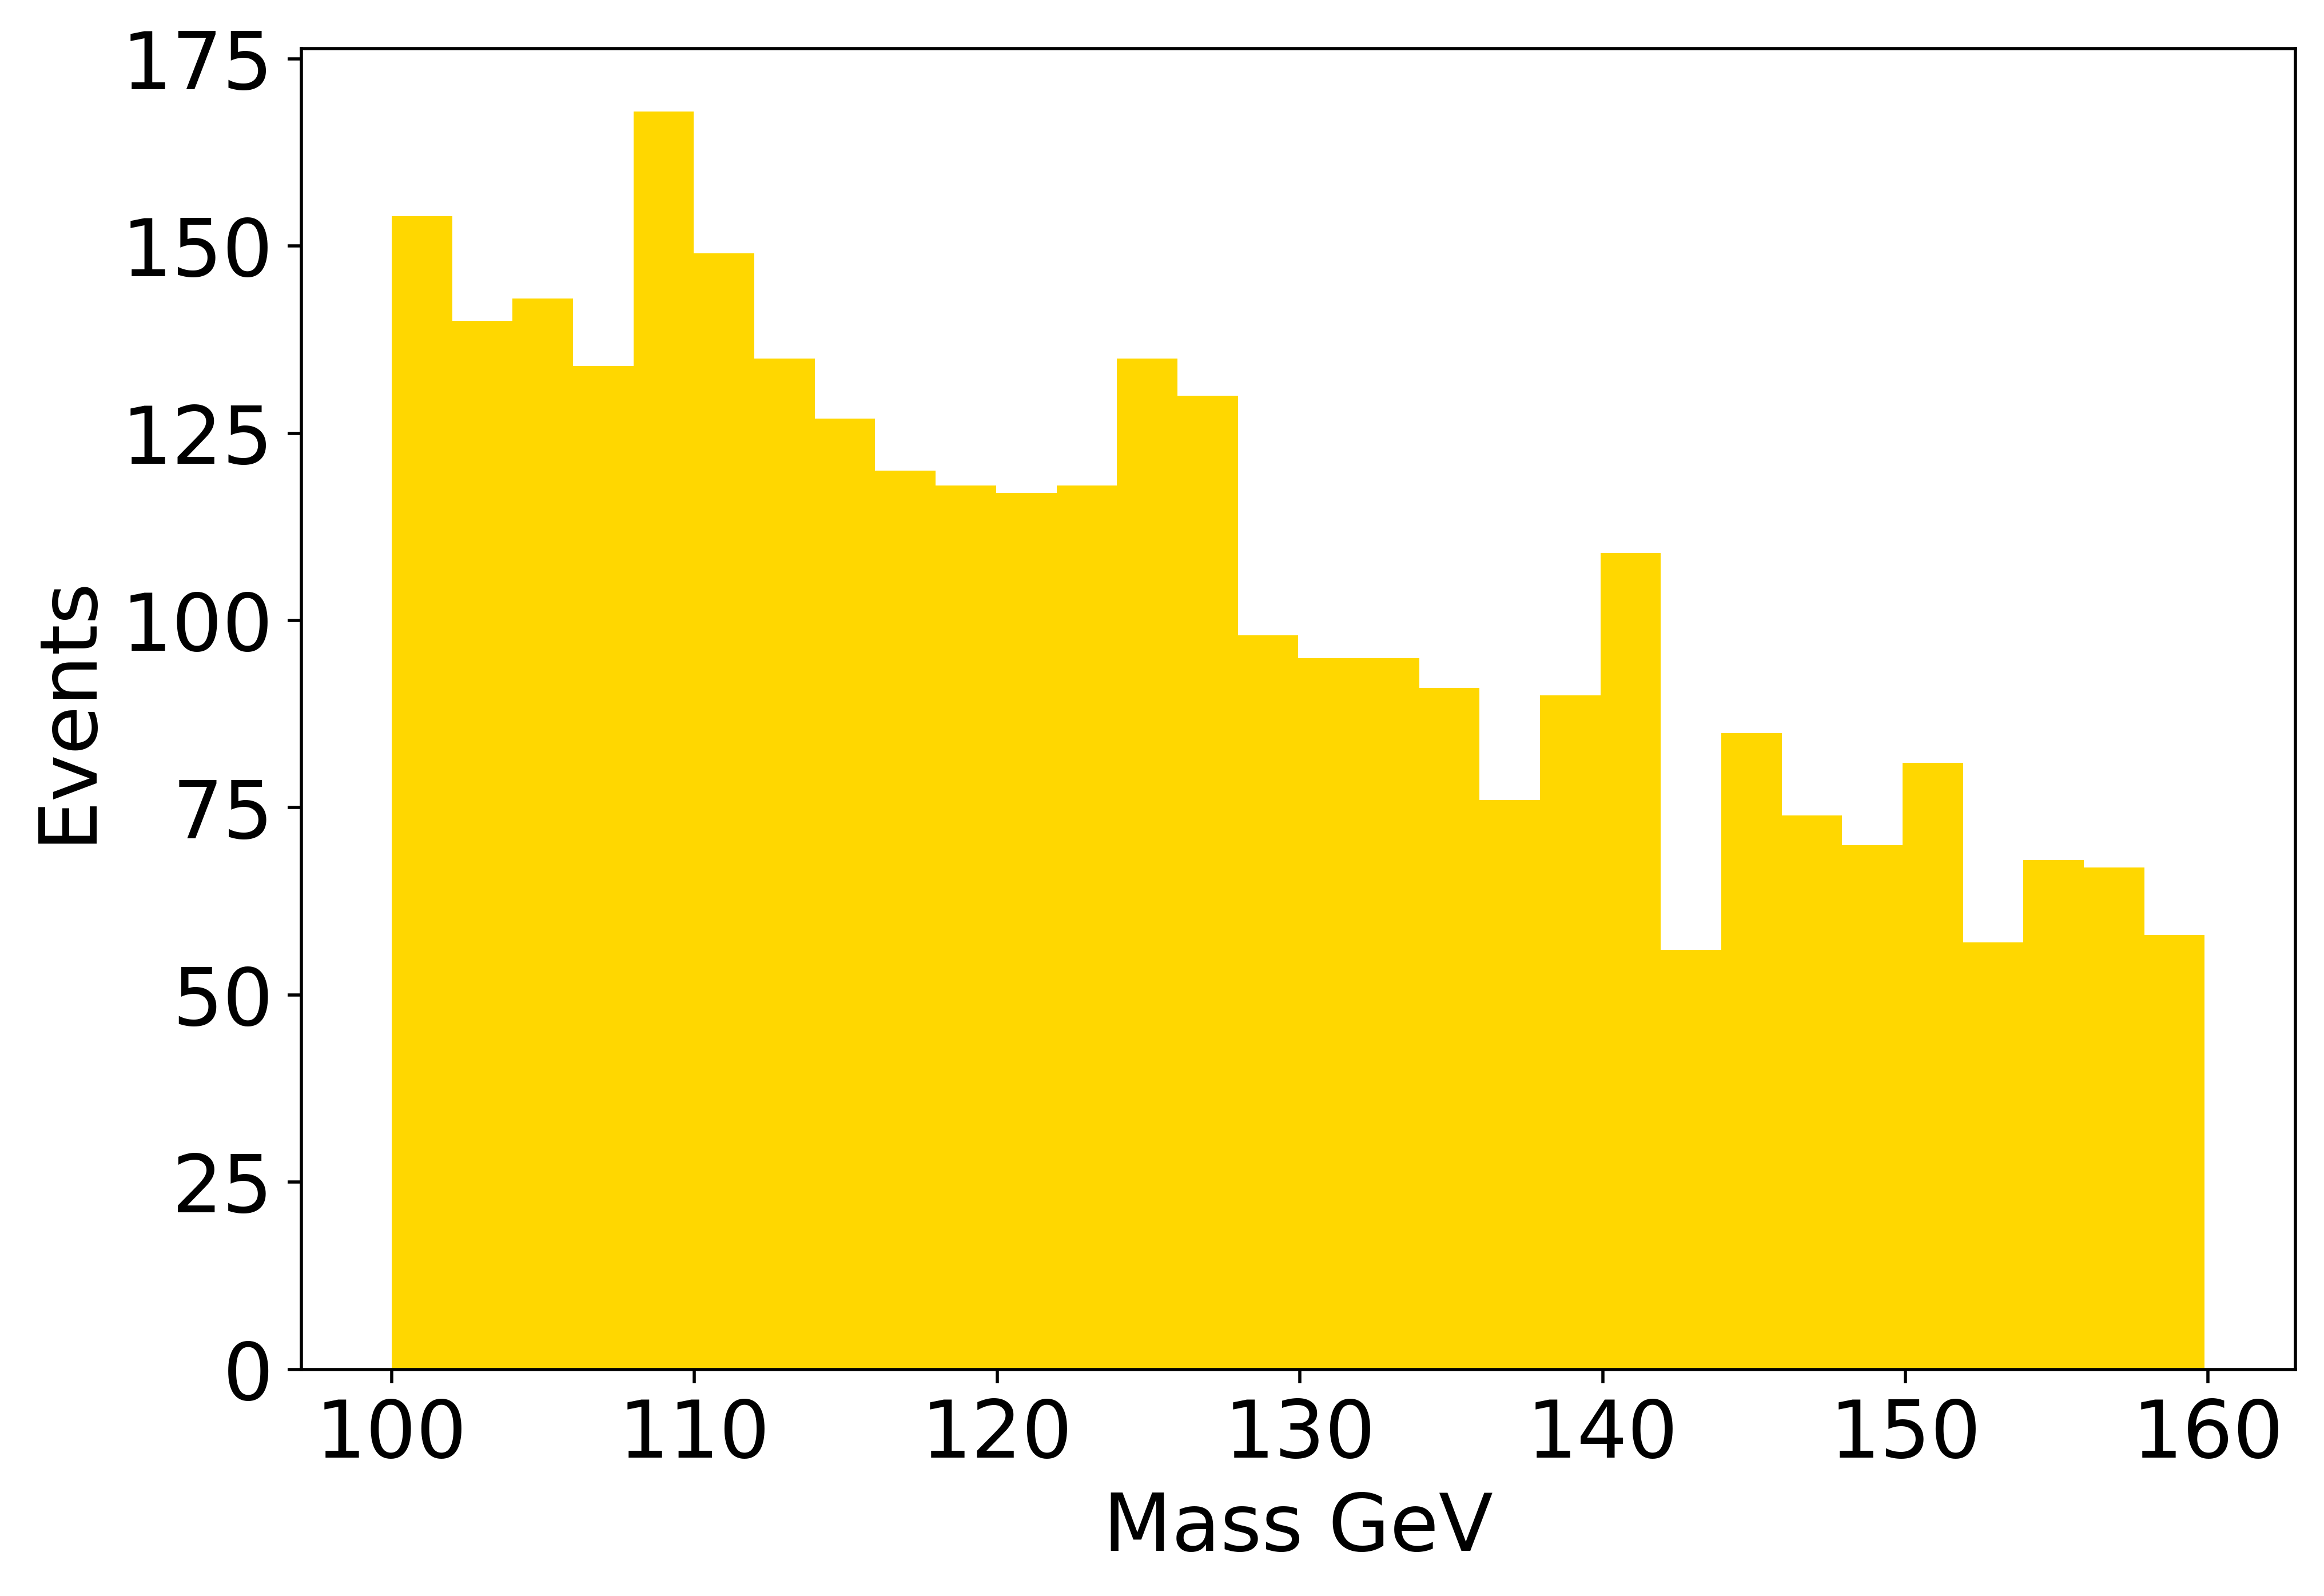

In [61]:
n, bins, patches = plt.hist(data['myy'], bins = 30, color = 'gold')
#plt.xlim(90, 170)
plt.xlabel('Mass GeV')
plt.ylabel('Events');

In [65]:
data.describe()['myy'][['min', 'max']]

min    100.006764
max    159.887652
Name: myy, dtype: float64

In [66]:
H_array = data['myy'].values

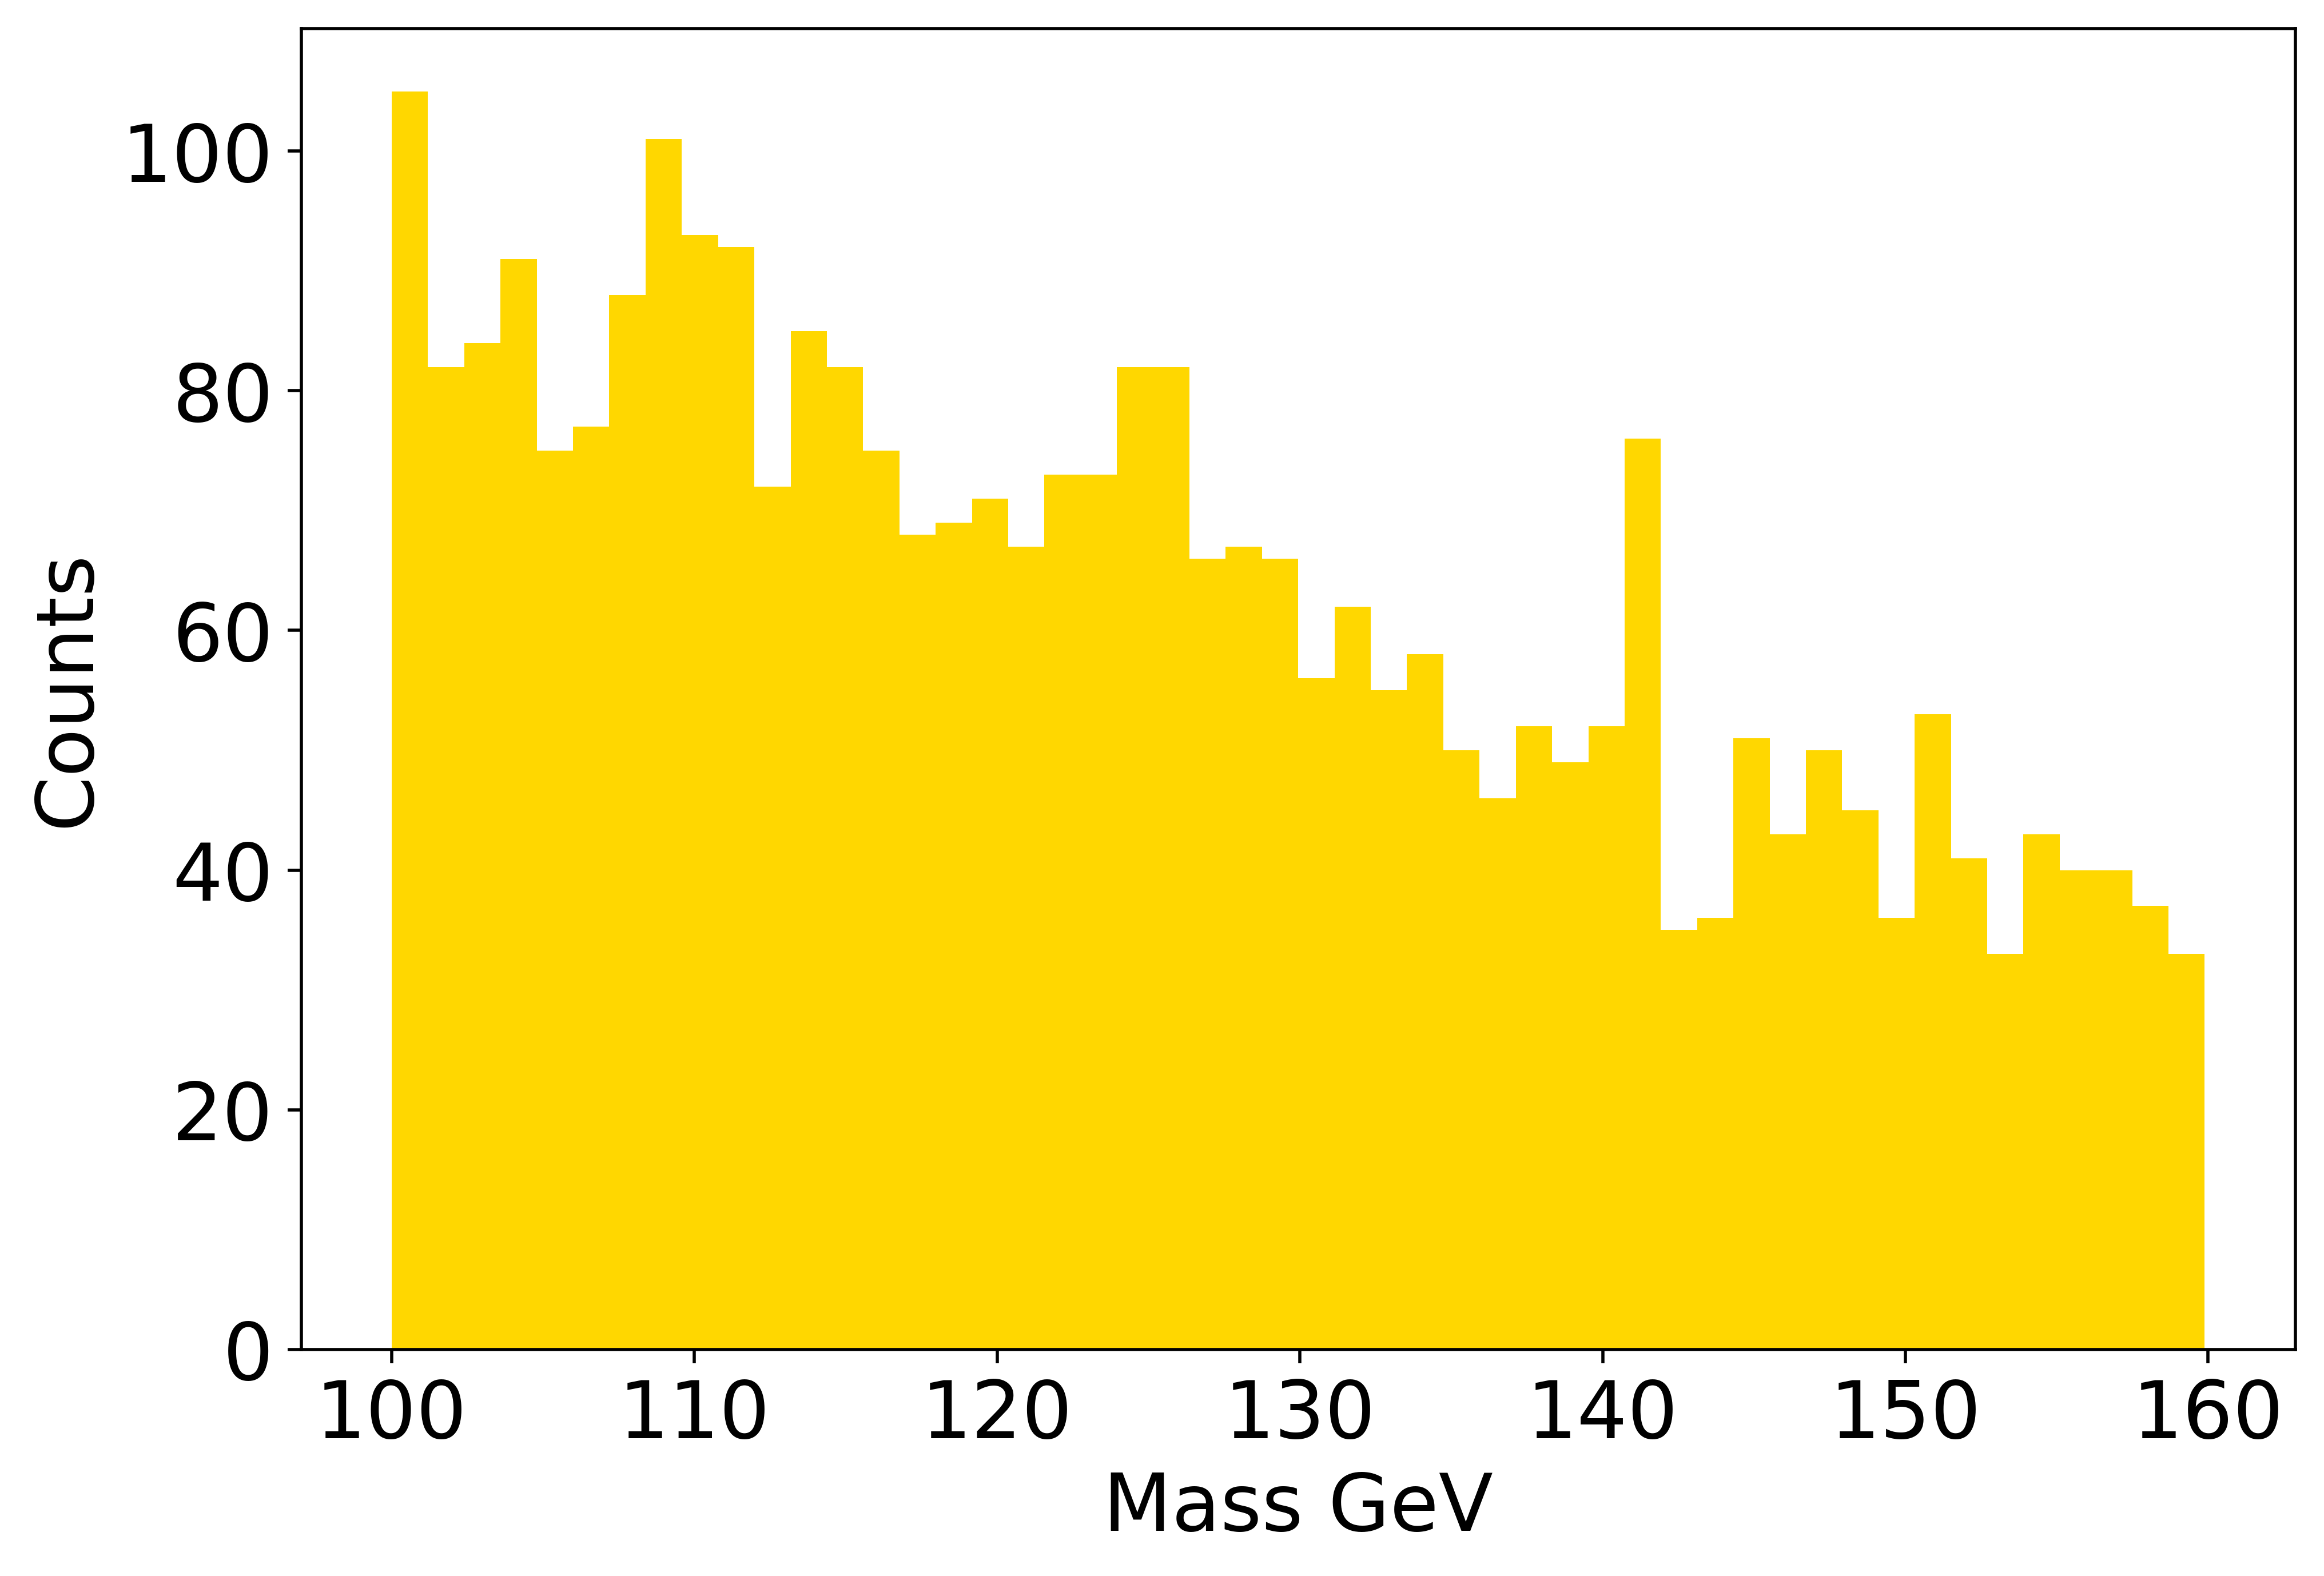

In [67]:
n, bins, patches = plt.hist(H_array, bins = 50, color = 'gold')
plt.xlabel('Mass GeV')
plt.ylabel('Counts');

# Fitting

In [68]:
def pdf_Gauss_2nd(x, a, b, c, loc, sigma, F):
    
    """
    Pdf with 2nd order polynomial and gaussian
    """
    
    up = min(x)
    down = max(x)
    
    function = lambda x: (a*x**2 + b*x + c)
    area = integrate.quad(function, up, down)[0]
    poly2nd = ((a*x**2 + b*x + c) / area) 
    
    
    
    gaussian = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-(x-loc)**2 / (2*sigma**2))
    
    return F*poly2nd + (1-F)*gaussian

In [69]:
c = cost.UnbinnedNLL(H_array, pdf_Gauss_2nd)

m = Minuit(c, a = 484, b = -171652, c = 16366636, loc = 125, sigma = 2, F = 0.9)
m.limits["F"] = (0, 1)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.559e+04                  │              Nfcn = 325              │
│ EDM = 2.23e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a     │    340    │    40     │            │            │         │         │       │
│ 1 │ b     │  -144e3   │    7e3    │            │            │         │         │       │
│ 2 │ c     │  16.4e6   │   1.7e6   │            │            │         │         │       │
│ 3 │ loc   │   125.5   │    0.8    │            │            │         │         │       │
│ 4 │ sigma │    1.6    │    0.8    │            │            │         │         │       │
│ 5 │ F     │   0.983   │   0.008   │            │            │    0    │    1    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────┐
│       │         a         b         c       loc     sigma         F │
├───────┼─────────────────────────────────────────────────────────────┤
│     a │  1.59e+03 -6.78e+04    -4e+07   -0.0284      2.49   -0.0435 │
│     b │ -6.78e+04  5.11e+07 -7.48e+09     -11.1      99.9     -1.73 │
│     c │    -4e+07 -7.48e+09   2.8e+12 -4.38e+03  -9.6e+04  1.68e+03 │
│   loc │   -0.0284     -11.1 -4.38e+03     0.635   -0.0774  0.000556 │
│ sigma │      2.49      99.9  -9.6e+04   -0.0774     0.587  -0.00307 │
│     F │   -0.0435     -1.73  1.68e+03  0.000556  -0.00307  5.72e-05 │
└───────┴─────────────────────────────────────────────────────────────┘

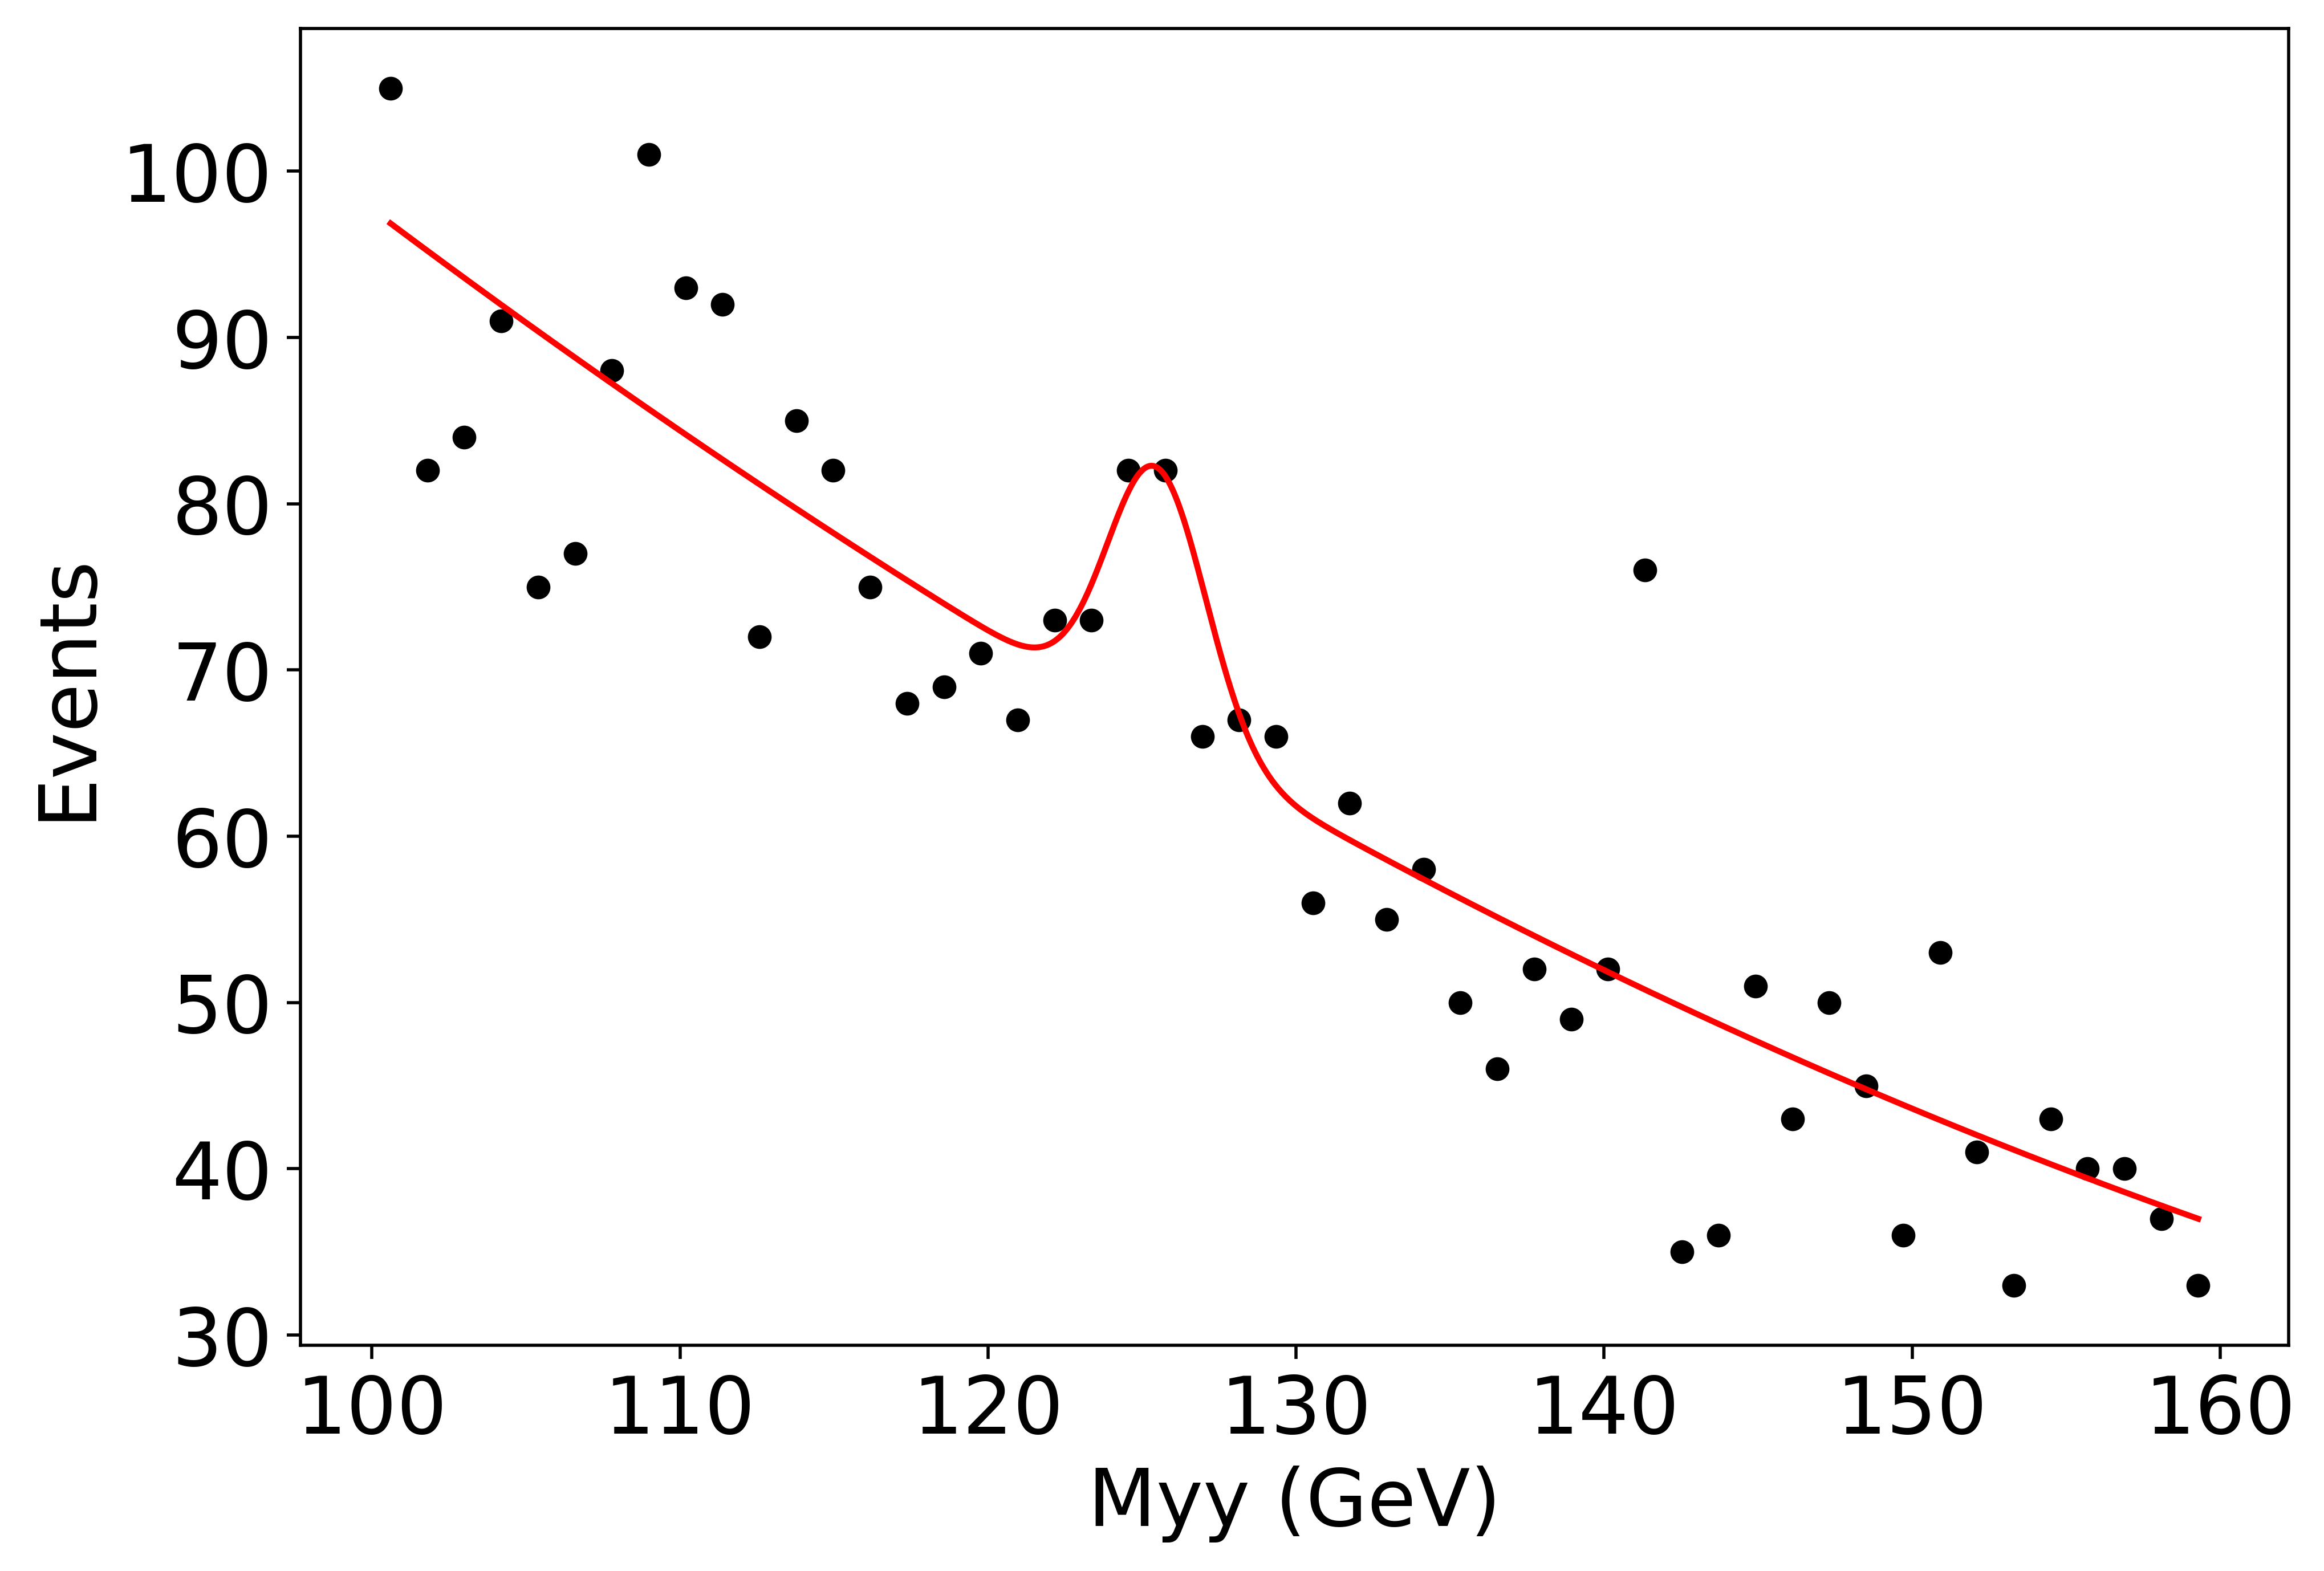

In [70]:
xcenters = (bins[:-1] + bins[1:]) / 2
scale = (bins[1] - bins[0])* sum(n)

x_array = np.arange(xcenters[0], xcenters[-1], 0.01)

plt.plot(xcenters, n, color = 'black', linestyle = '', marker = 'o', markersize = 5)
plt.plot(x_array ,scale * pdf_Gauss_2nd(x_array, *m.values), color = 'red')
plt.ylabel('Events')
plt.xlabel('Myy (GeV)');

In [71]:
def pdf_5th(x, a, b, c, d, e, f):
    
    """
    Pdf with 5th order polynomial
    """
    
    up = H_array.min()
    down = H_array.max()
    
    function = lambda x: (a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f)
    area = integrate.quad(function, up, down)[0]
    
    
    
    return (a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f) / area

In [72]:
def DSCB_int(x, mu_cb, s_cb, a_l, a_h, n_l, n_h):
    
    
    t = (x - mu_cb)/s_cb
    
    if (-a_l <= t) & (t <= a_h): 
       
        return np.exp(-0.5 * (t)**2)
        
    if (t < -a_l): 
        
        return np.exp(-0.5 * a_l**2) * ((a_l/n_l) * ((n_l/a_l) - a_l - t))**(-n_l)
        
    if (t > a_h): 
        
        return np.exp(-0.5 * a_h**2) * ((a_h/n_h) * ((n_h/a_h) - a_h + t))**(-n_h)
    
    else:
        return 0

In [73]:
def pdf_DSCB(myy, mu_cb, s_cb, a_l, n_l, a_h, n_h):
    
    #a_l = a_h = a
    #n_l = n_h = n
    
    
    def cb(x, mu_cb, s_cb, a_l, a_h, n_l, n_h):
        
        t = (x - mu_cb)/s_cb 
        y = t * 0


        #Guassian core 
        y[(-a_l <= t) & (t <= a_h)] = np.exp(-0.5 * (t[(-a_l <= t) & (t <= a_h)])**2)

        #lower tail 
        y[(t < -a_l)] = np.exp(-0.5 * a_l**2) * ((a_l/n_l) * ((n_l/a_l) - a_l - t[(t < -a_l)]))**(-n_l)

        #upper tail 
        y[(t > a_h)] = np.exp(-0.5 * a_h**2) * ((a_h/n_h) * ((n_h/a_h) - a_h + t[(t > a_h)]))**(-n_h)
        
        return y
    
    function = lambda x: DSCB_int(x, mu_cb, s_cb, a_l, a_h, n_l, n_h)
    
    area = integrate.quad(function, myy.min(), myy.max())[0]
    
    DSCB = cb(myy, mu_cb, s_cb, a_l, a_h, n_l, n_h)/area
    
    return DSCB

In [74]:
def pdf_combined(myy, F):
    
    #cb params
    mu_cb = 125.03562717287977
    s_cb = 1.641953414659304
    a_l = 1.5633459305399353
    n_l=4.552721531175962 
    a_h=1.4358665705748406 
    n_h=8.768059830469596

    #poly params
    a = -3.363339350998184e-05 
    b=0.010638083563390185 
    c=-0.3826848352084346 
    d=-62.29961223538256 
    e=-20599.35421963817 
    f=3321837.599021612
    
    DSCB = pdf_DSCB(myy, mu_cb, s_cb, a_l, n_l, a_h, n_h)
    poly = pdf_5th(myy, a, b, c, d, e, f)
    
    return DSCB*F + (1-F)*poly


c_combined = cost.UnbinnedNLL(H_array, pdf_combined)

m_comb = Minuit(c_combined, F = 0.1)
m_comb.limits["F"] = (0, 1)
m_comb.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.56e+04                   │              Nfcn = 22               │
│ EDM = 8.08e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ F    │   0.020   │   0.007   │            │            │    0    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        F │
├───┼──────────┤
│ F │ 4.82e-05 │
└───┴──────────┘

In [94]:
def pdf_bck(myy, F):
    
    #cb params
    mu_cb = 125.03562717287977
    s_cb = 1.641953414659304
    a_l = 1.5633459305399353
    n_l=4.552721531175962 
    a_h=1.4358665705748406 
    n_h=8.768059830469596

    #poly params
    a = -3.363339350998184e-05 
    b=0.010638083563390185 
    c=-0.3826848352084346 
    d=-62.29961223538256 
    e=-20599.35421963817 
    f=3321837.599021612
    
    DSCB = pdf_DSCB(myy, mu_cb, s_cb, a_l, n_l, a_h, n_h)
    poly = pdf_5th(myy, a, b, c, d, e, f)
    
    return (1-F)*poly

In [114]:
def pdf_sig(myy, F):
    
    #cb params
    mu_cb = 125.03562717287977
    s_cb = 1.641953414659304
    a_l = 1.5633459305399353
    n_l=4.552721531175962 
    a_h=1.4358665705748406 
    n_h=8.768059830469596

    #poly params
    a = -3.363339350998184e-05 
    b=0.010638083563390185 
    c=-0.3826848352084346 
    d=-62.29961223538256 
    e=-20599.35421963817 
    f=3321837.599021612
    
    DSCB = pdf_DSCB(myy, mu_cb, s_cb, a_l, n_l, a_h, n_h)
    poly = pdf_5th(myy, a, b, c, d, e, f)
    
    return DSCB*F

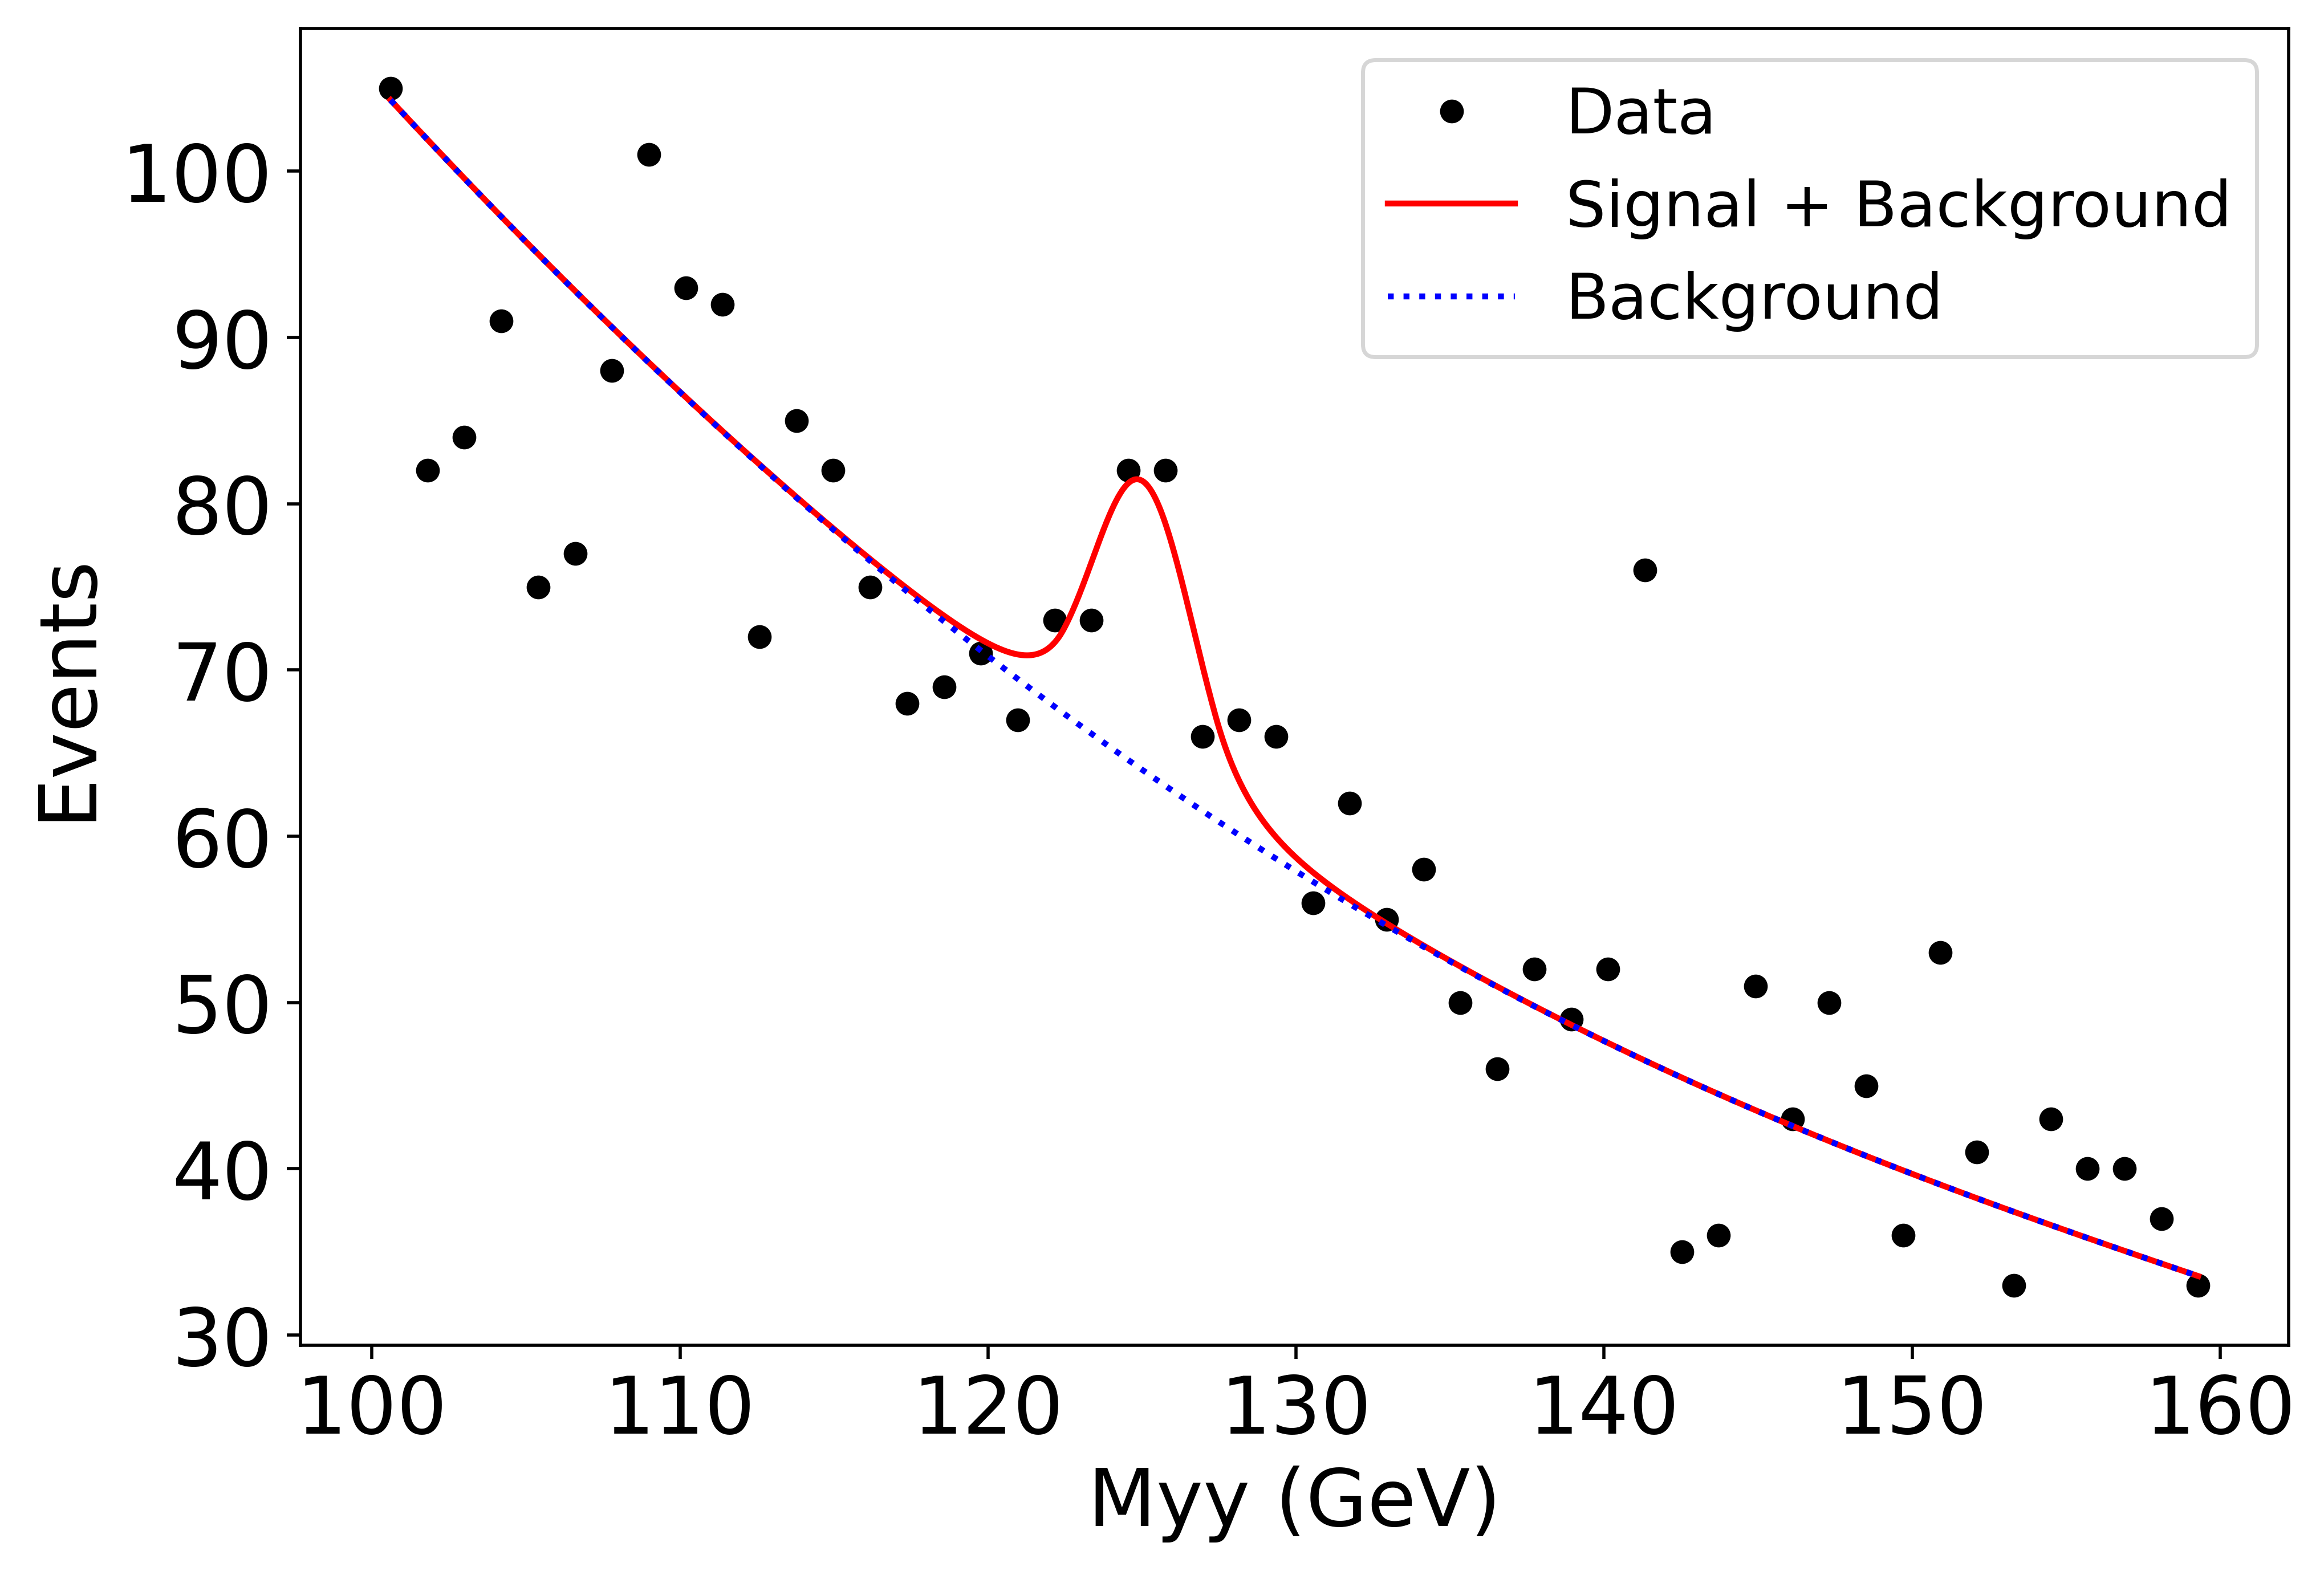

In [107]:
ybck = pdf_bck(x_array, *m_comb.values)


plt.plot(xcenters, n, color = 'black', linestyle = '', marker = 'o', markersize = 5, label = 'Data')
plt.plot(x_array ,scale * pdf_combined(x_array, *m_comb.values), color = 'red', label = 'Signal + Background')
plt.plot(x_array ,scale * ybck, color = 'blue', label = 'Background', linestyle = 'dotted')
plt.ylabel('Events')
plt.xlabel('Myy (GeV)')
plt.legend(fontsize = '16');

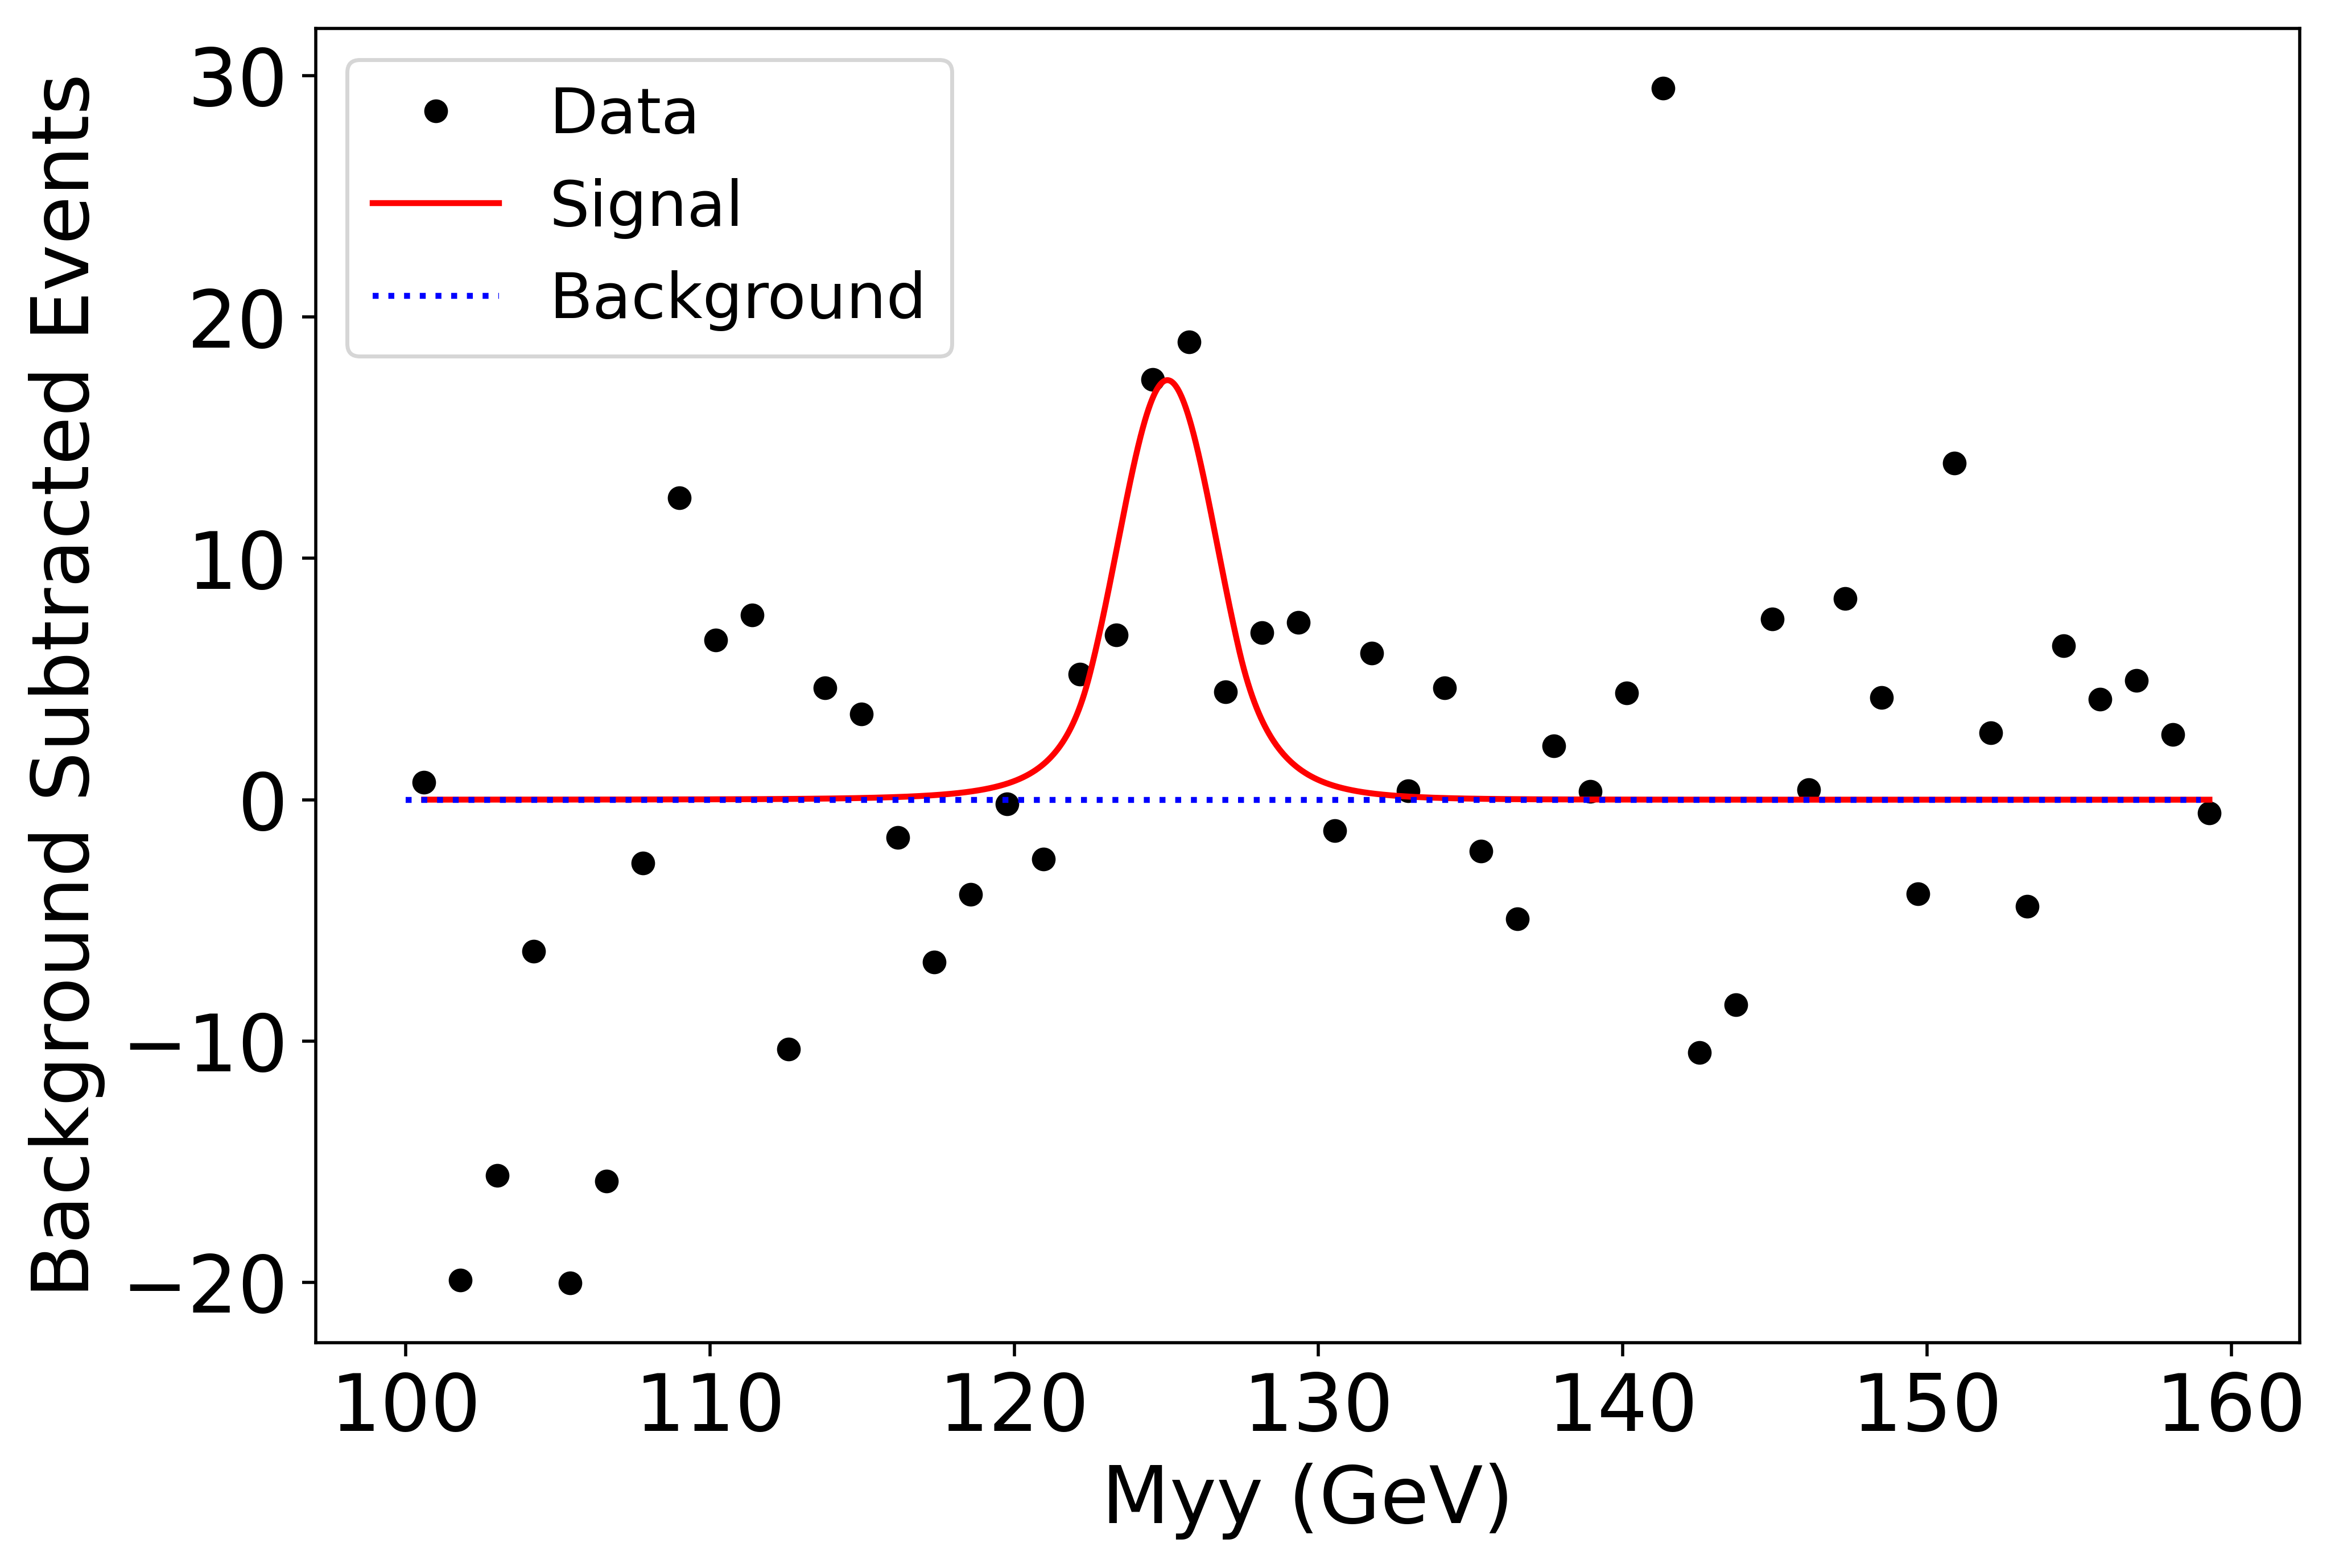

In [122]:
ybck_bins = pdf_bck(xcenters, *m_comb.values)
line = np.arange(100, 160, 1)

plt.plot(xcenters, n - ybck_bins*scale, color = 'black', linestyle = '', marker = 'o', markersize = 5, label = 'Data')
plt.plot(x_array ,scale * pdf_sig(x_array, *m_comb.values), color = 'red', label = 'Signal');
plt.plot(line ,np.zeros(len(line)), color = 'blue', label = 'Background', linestyle = 'dotted')
plt.ylabel('Background Subtracted Events')
plt.xlabel('Myy (GeV)')
plt.legend(fontsize = '16');

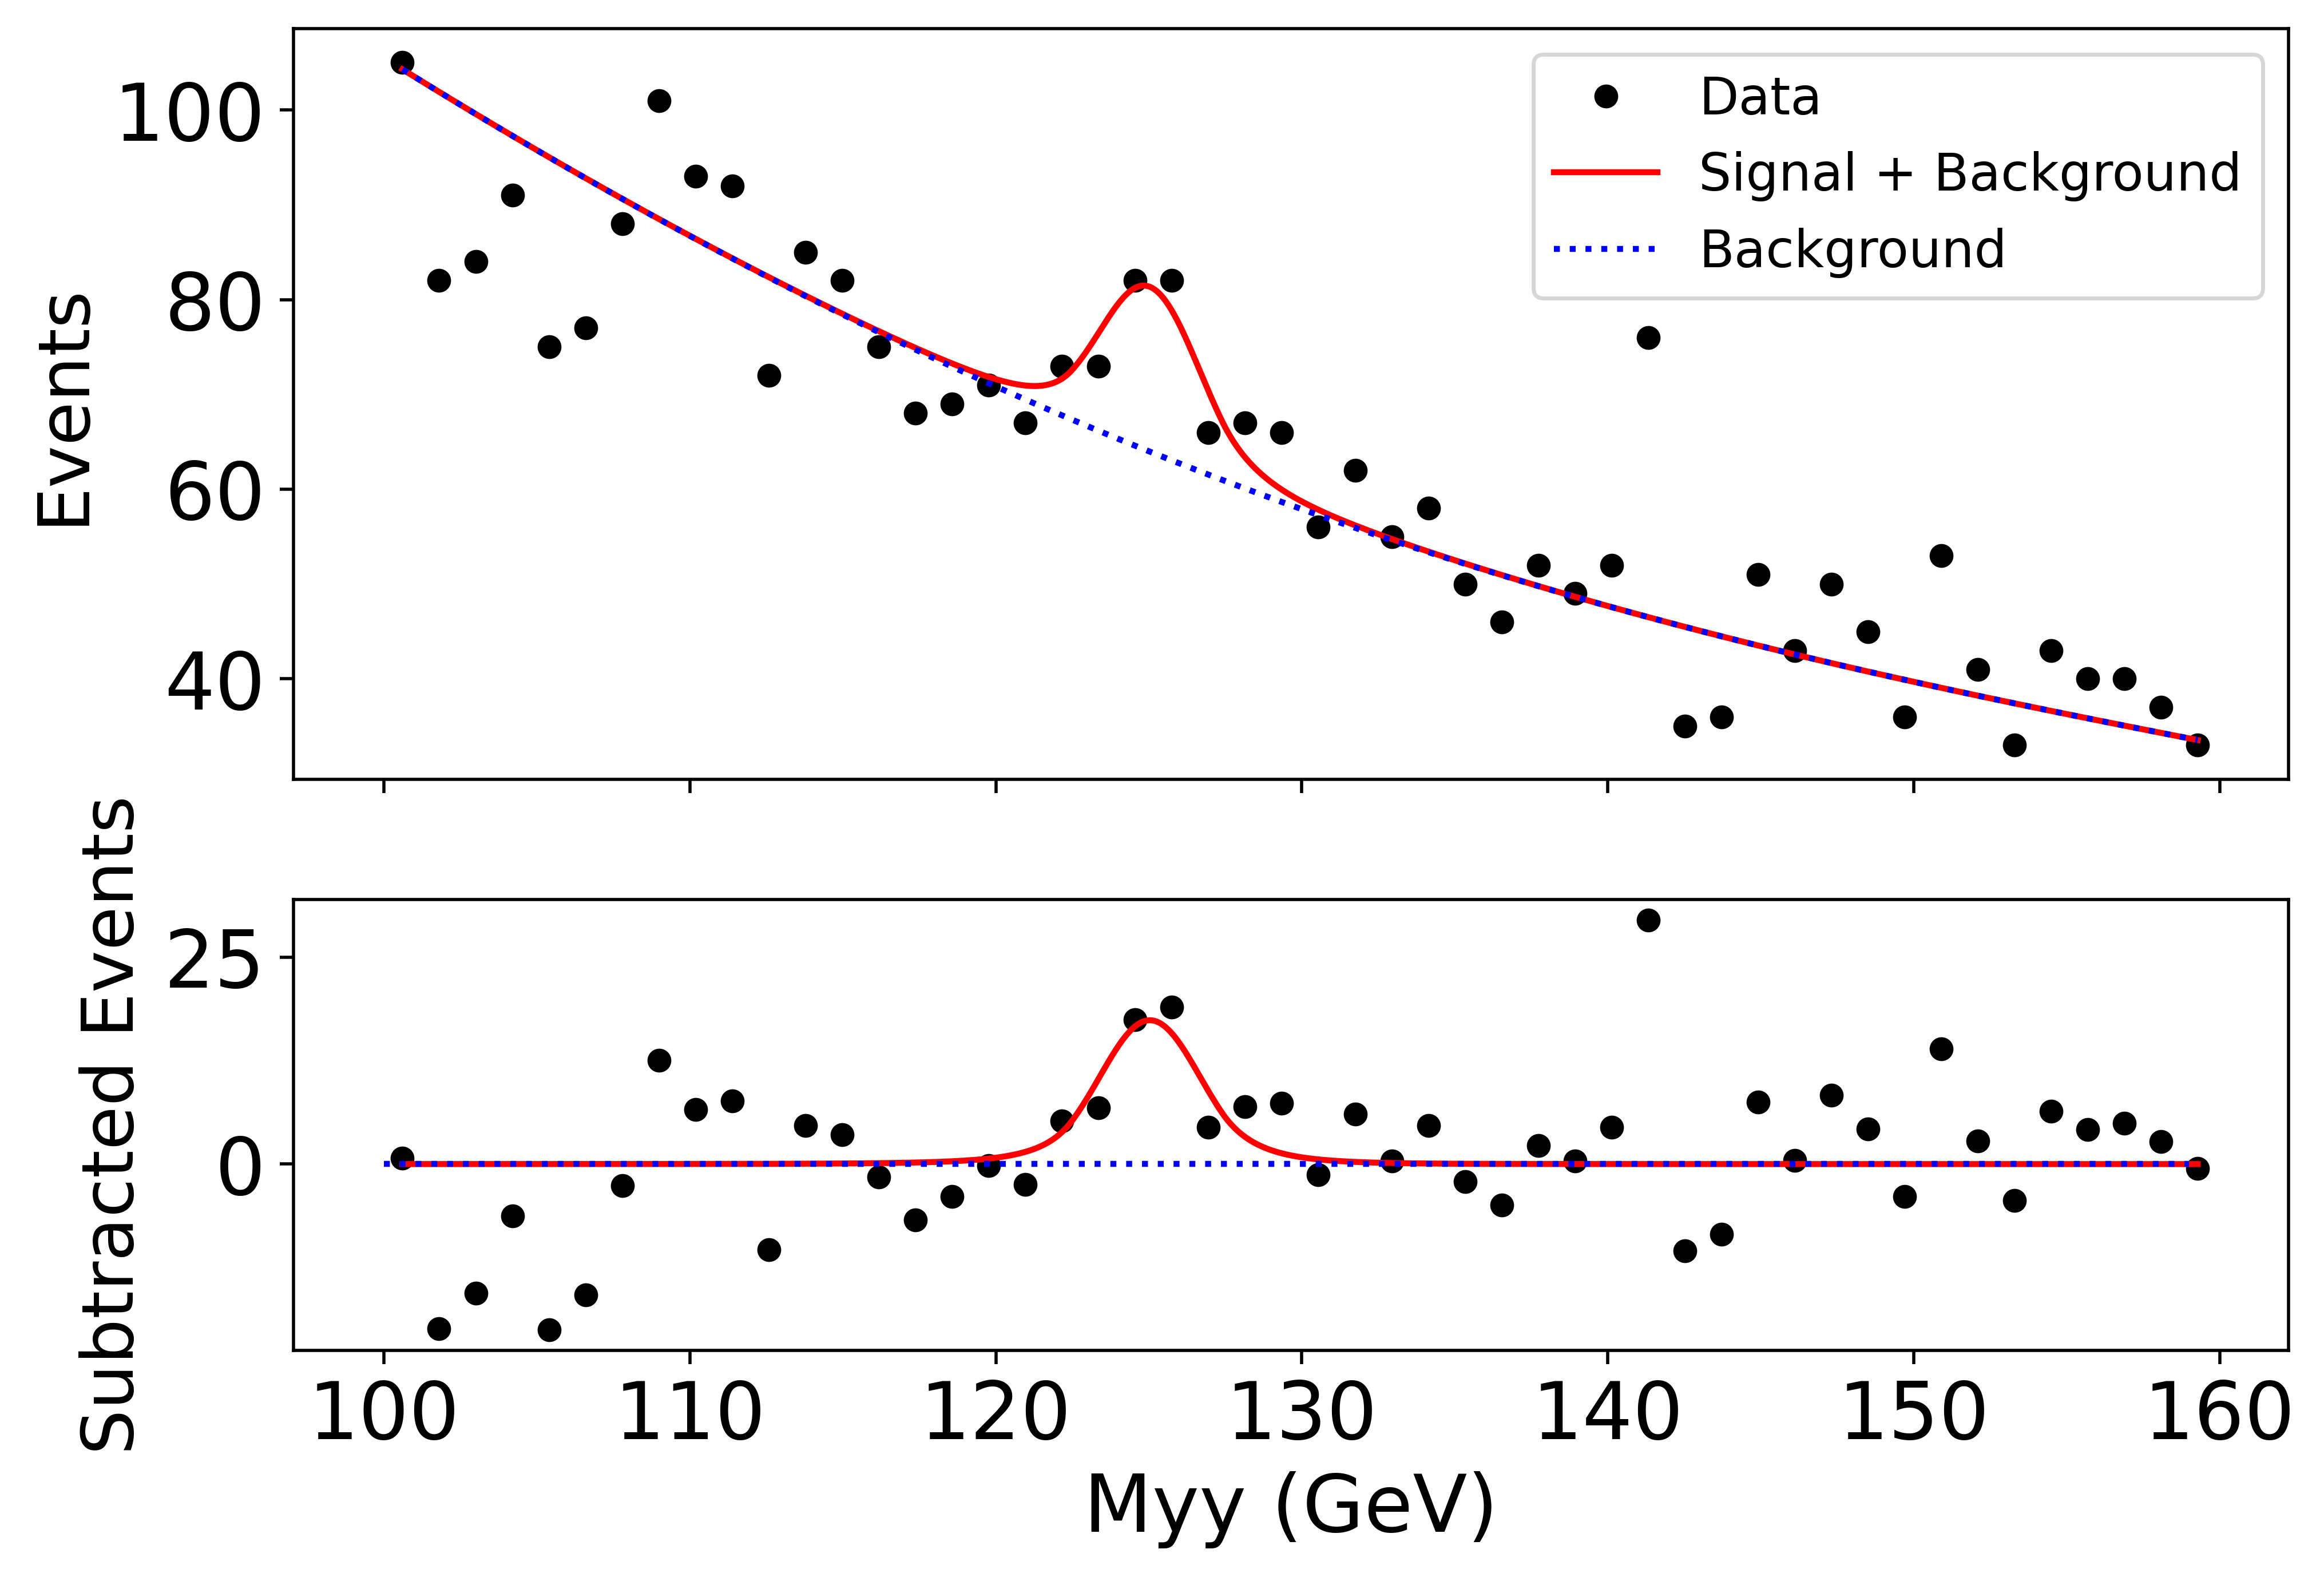

In [143]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, height_ratios=[5, 3])

ax1.plot(xcenters, n, color = 'black', linestyle = '', marker = 'o', markersize = 5, label = 'Data')
ax1.plot(x_array ,scale * pdf_combined(x_array, *m_comb.values), color = 'red', label = 'Signal + Background')
ax1.plot(x_array ,scale * ybck, color = 'blue', label = 'Background', linestyle = 'dotted')
ax1.set_ylabel('Events', fontsize = '18')
ax1.legend(fontsize = '13');

ax2.plot(xcenters, n - ybck_bins*scale, color = 'black', linestyle = '', marker = 'o', markersize = 5, label = 'Data')
ax2.plot(x_array ,scale * pdf_sig(x_array, *m_comb.values), color = 'red', label = 'Signal');
ax2.plot(line ,np.zeros(len(line)), color = 'blue', label = 'Background', linestyle = 'dotted')
ax2.set_ylabel('Subtracted Events', fontsize = '18')
ax2.set_xlabel('Myy (GeV)');

In [43]:
numpeak = m_comb.values[0]*sum(n)
numpeak

64.12572845682857

In [44]:
datacut = data[data.myy > 120]
datacut = datacut[datacut.myy < 130]
datacut

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets,jet1_pt,...,jet23_DL1R,jet1_fom,jet2_fom,jet3_fom,quark_fom,y1_fom,y2_fom,H_fom,mjjj,myy
363,64254.5,1.937410,-1.20217,227616.0,54191.8,1.047970,2.007660,86774.8,4,45835.8,...,-9000.0,[ 58105.5 -35538.05107032 28947.668088...,[175189. 69465.23425367 -11424.974062...,[101252. -552.86796807 31208.103210...,[334546.5 33374.31521528 48730.797236...,[227616. 23153.10529728 -59938.088769...,[ 86774.8 -22928.53854666 49102.273952...,[ 3.14390800e+05 2.24566751e+02 -1.08358148e+...,154.262111,129.819902
1604,56757.0,-1.367200,-1.48775,118599.0,31153.1,0.685587,2.268990,38765.9,3,26808.5,...,-9000.0,[27355.8 25110.13318056 9390.25473055 ...,[ 49949. 22343.45675991 -29406.128696...,[122929. -15612.09757319 24336.484073...,[200233.8 31841.49236729 4320.610107...,[ 118599. 4708.04435682 -56561.394...,[ 38765.9 -20026.30559525 23863.418108...,[157364.9 -15318.26123843 -32697.976564...,177.170801,129.955511
2013,90251.5,1.139620,-1.13156,155482.0,47104.1,0.284180,3.041320,49019.0,3,33388.8,...,-9000.0,[105553. 21112.51161342 25866.461273...,[295756. -13724.66740246 81471.054158...,[ 66936.9 -36685.04259284 33239.488064...,[468245.9 -29297.19838188 140577.003496...,[155482. 38379.30654366 -81684.527797...,[ 49019. -46867.49178883 4715.342006...,[204501. -8488.18524517 -76969.185791...,124.868972,127.183847
3716,61418.7,0.940808,-1.79896,90665.2,56336.3,1.780890,1.985450,171928.0,3,35760.3,...,-9000.0,[44784.8 23036.05912136 27352.13037858 ...,[344004. 40230.2067654 -51849.6006848 ...,[50984.5 9094.19325401 29316.34321174 ...,[439773.3 72360.45914077 4818.872905...,[ 90665.2 -13892.24480426 -59826.935773...,[171928. -22696.37288909 51562.131020...,[262593.2 -36588.61769336 -8264.804752...,156.815925,122.671479
7573,50178.6,0.729558,-1.31443,64135.4,22016.0,-1.812140,0.725181,69205.4,3,114158.0,...,-9000.0,[ 638575. -98150.47190388 58296.945...,[ 50949.4 -14401.05201447 30282.418070...,[ 129820. 11979.11805047 -25522.254...,[ 819344.4 -100572.40586788 63057.109...,[ 64135.4 12723.65297584 -48538.650093...,[ 69205.4 16476.32047831 14602.572358...,[133340.8 29199.97345416 -33936.077734...,168.845260,122.949893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913809,44068.4,-1.940660,2.25877,156596.0,29733.6,0.265745,-1.285910,30789.6,3,35341.4,...,-9000.0,[ 41337.4 -34008.62569217 -9613.944689...,[ 78908.8 62091.34005371 -35249.678164...,[ 43002.3 -10738.75236937 34009.033493...,[163248.5 17343.96199217 -10854.589359...,[ 156596. -27982.24767935 34044.348...,[ 30789.6 8356.57956635 -28535.145818...,[ 187385.6 -19625.668113 5509.203...,143.317901,120.234639
913938,49613.5,-0.496822,1.76857,55863.6,31707.1,1.722370,-2.894100,91576.9,5,25453.8,...,-9000.0,[ 52040.7 -11927.38826147 -22486.292351...,[148146. 73032.26062919 47276.081792...,[ 48085.4 -29463.88658519 -33493.247969...,[248272.1 31640.98578253 -8703.458528...,[ 55863.6 -9748.4024043 48646.356829...,[ 91576.9 -30740.97524025 -7767.408299...,[147440.5 -40489.37764455 40878.948530...,166.854767,121.654194
914101,50746.5,1.594360,-2.34318,130120.0,49695.1,0.055163,0.366580,49770.7,3,35444.1,...,-9000.0,[195763. 30682.87889742 -17743.876898...,[ 76725.1 -27184.65408915 -48984.845496...,[ 42415.3 25710.17752973 29190.410645...,[314903.4 29208.402338 -37538.311749...,[130120. -35413.16712447 -36347.143718...,[49770.7 46393.28875517 17811.95448257 ...,[179890.7 10980.1216307 -18535.189235...,209.399177,129.907312
914679,69558.8,-0.750729,-1.34809,90098.4,34214.4,0.839928,2.074240,47009.5,4,32451.8,...,-9000.0,[ 36250.6 30682.87688033 -10567.894283...,[56050.6 19012.09413576 42406.24128808 ...,[ 66031.6 -32633.56498317 31427.441392...,[158332.8 17061.40603291 63265.788397...,[ 90098.4 15363.44645874 -67840.925482...,[ 47009.5 -16506.55927826 29969.295423...,[137107.9 -1143.11281952 -37871.630059...,144.135938,129.370195


In [45]:
datacut.describe()['myy'][['min', 'max']]

min    120.040699
max    129.998910
Name: myy, dtype: float64

In [47]:
fracth = 7.073793793111132/(7.073793793111132 + 23.73468447238262 + 202.0784407045653)

In [48]:
(fracth*numpeak)/np.sqrt(datacut.shape[0])

0.07958408011093637

In [49]:
fracth*numpeak

1.9477786985320635